<a href="https://colab.research.google.com/github/viciak98/ML-w-finansach/blob/etap4/umwf2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             time   code   return2  \
0      2004-02-11    GGG  0.055986   
1      2004-02-11    CWT  0.080367   
2      2004-02-11    BLL  0.015843   
3      2004-02-11    APA  0.052312   
4      2004-02-11   MATX  0.077529   
...           ...    ...       ...   
29649  2022-02-09   SLGN -0.024445   
29650  2022-02-09    PEP -0.020117   
29651  2022-02-09    GEF -0.037857   
29652  2022-02-09    DPZ -0.015887   
29653  2022-02-09  LIFZF  0.086517   

                                                       0 number  \
0      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    GGG   
1      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    CWT   
2      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    BLL   
3      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    APA   
4      10:01:54.481 77425 [77425-thread-2] INFO  a.s....   MATX   
...                                                  ...    ...   
29649  10:27:03.049 77425 [77425-thread-2] INFO  a.s....   SLGN   
29650  

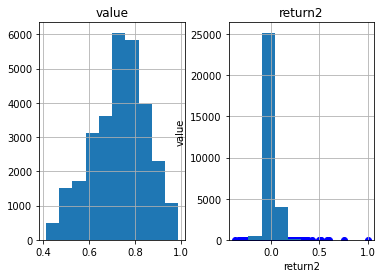

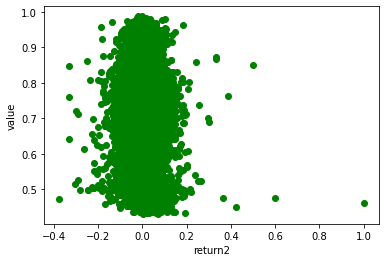

Coefficients: [[-0.09460618]]
Intercept: [0.73195119]


In [3]:
import pandas as pd

df = pd.read_csv('CONVICTIONLISTTOPN_BSLD-408.csv',header=None)
df.rename(columns={1: "time", 2: "number", 3: "code", 4: "type", 5: "mer", 6: "value"}, inplace=True)

data = pd.read_csv('zwroty.csv')
data.columns = ["time", "code", "return2"]
sl_score = {}

for lab, row in df.iterrows():
    sl_score[row["time"]] = {}
    if "." in row["code"]:
      znak_z_x = row["code"]
      indeks_znaku = znak_z_x.index(".")
      row["code"] = znak_z_x[0:indeks_znaku]

    sl_score[row["time"]][row["code"]] = row["value"]

df2 = pd.merge(data, df, on=['time','code'])

print(df2)

import matplotlib.pyplot as plt

df2.head()

df.describe()

dataset = df2[['value','number','type','return2']]
dataset.head(10)

x = dataset[['value','return2']]
x.hist()

plt.scatter(dataset['return2'], dataset['value'],  color='blue')
plt.xlabel("return2")
plt.ylabel("value")
plt.show()

from sklearn.model_selection import train_test_split

X = df2[['return2']].values
y = df2[['value']].values

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)
split = int(0.8 * len(df2)) #800
split3 = int(0.9 * len(df2)) #800
split1 = int(0.1 * len(df2))
split2 = int(0.5 * len(df2))
split4 = int(0.6 * len(df2))


test1 = df[:split1]
test2 = df[split2:split4]
test3 = df[:split3]

train = dataset[:split] # 1-799
test = dataset[split:]

plt.scatter(train.return2, train.value,  color='green')
plt.xlabel("return2")
plt.ylabel("value")
plt.show()

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)

# The coefficients of the model
print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

output = regr.predict(test_x)

In [4]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.utils.validation import column_or_1d

In [5]:
from sklearn.metrics import accuracy_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(output - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((output - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , output) )
print(f"Accuracy = {regr.score(test_y, output)}")


Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: 0.00
Accuracy = -273.7438800795242


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.preprocessing import StandardScaler
regr1 = make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.1,gamma="scale",kernel = "rbf"))
regr1.fit(train_x, train_y.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=1))])

In [8]:
y_pred = regr1.predict(test_x)
print(y_pred)

[0.743096   0.73872923 0.72645768 ... 0.72959403 0.67699698 0.73792036]


In [9]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_pred) )
print(f"Accuracy = {regr1.score(test_y,y_pred)}")


Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01
R2-score: 0.03
Accuracy = -24.230060205710895


In [21]:
import pandas as pd
import time

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [ ]:
model = XGBClassifier(use_label_encoder=False)
start_time = time.time()
model.fit(train_x, train_y.ravel())
print("--- %s seconds ---" % (time.time() - start_time))
predictions = model.predict(test_x)
score = model.score(test_x, test_y)
print(score)
print(confusion_matrix(test_y, predictions))

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, init = "k-means++")
  kmeans.fit(test1)
  wcss.append(kmeans.inertia_)



In [ ]:
wcss

In [ ]:
plt.plot(range(1,11), wcss)

In [ ]:
kmeans = KMeans(n_clusters = 5, init = "k-means++")
y_kmeans = kmeans.fit_predict(test1)

In [ ]:
y_kmeans